## <b> OCR Using Image </b>

In this project, text ill be extracted from images. After extracting the text, some OpenCV functions will be used to ehance it and get more accurate results. The project is useful as it will save time and effort in terms of typing out the content of an image.

In [1]:
import requests

We download the tesseract file required for the pytessearct library to run, and we will save this file with the open() function.

In [2]:
# Downloading the required tesseract file
r = requests.get('https://github.com/tesseract-ocr/tessdata/raw/4.00/eng.traineddata', stream=True)

# Writing data to file
with open('eng.traineddata', 'wb') as file:
    for block in r.iter_content(chunk_size = 1024):
        if block:
            file.write(block)

Now, we install the required libraries

In [6]:
from  PIL import Image
import pytesseract
import cv2
import numpy as np
from pytesseract import Output
import re
from io import BytesIO

Now we will open an image, resize it and save it for later use

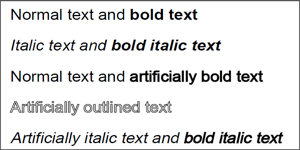

In [8]:
def load_image(img_path):
    if 'https' in img_path:
        response = requests.get(img_path, stream = True).raw
        image = Image.open(response)
    else:
       image = Image.open(img_path)
    return image

image = load_image('https://i.stack.imgur.com/pbIdS.png')
image = image.resize((300, 150))
image.save('sample.png')
image

Locate the tesseract setup in your local computer

In [11]:
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'  # your path may be different

Extraction of text from image with custom configuration

In [12]:
# Simple extraction of text from image
custom_config = r'-l eng --oem 3 --psm 6'
text = pytesseract.image_to_string(image, config = custom_config)
print(text)

Normal text and bold text

Italic text and bold italic text

Normal text and artificially bold text
Artificially outlined text

Artificially italic text and bold italic text



We will write a block of code to remove unwanted symbols from any text we extract

In [14]:
try:
    text = pytesseract.image_to_string(image)
    char_to_remove = '!()@-*">+_/,''|$#%^&~`'
    new_string = text
    for char in char_to_remove:
        new_string.replace(char, "")
    print(new_string)
except IOError as e:
    print("Error (%s)" %e)

Normal text and bold text

Italic text and bold italic text

Normal text and artificially bold text
Artificially outlined text

Artificially italic text and bold italic text




We are going to read the image into OpenCV and process it further. This is requred for the extraction of text from complex images. Some of the transformations that can be carried out are shown below:

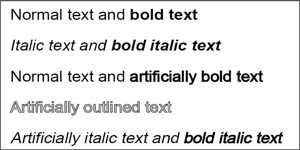

In [33]:
image = cv2.imread("sample.png")

# Conversion to grayscale
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = grayscale(image)
Image.fromarray(gray)

1) Noise Removal

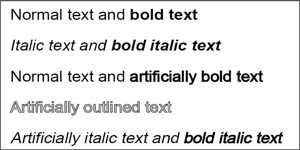

In [35]:
# Noise Removal
def noise_removal(image):
    return cv2.medianBlur(image, 1)
noise = noise_removal(gray)
Image.fromarray(noise)

2) Thresholding

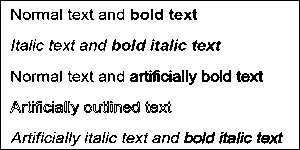

In [36]:
# Thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
thresh = thresholding(gray)
Image.fromarray(thresh)

3) Erosion

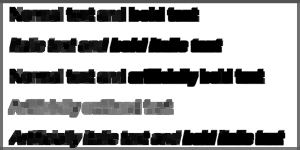

In [37]:
# Erosion
def erode(image):
    kernel = np.ones((5,5), np.uint8)
    return cv2.erode(image, kernel, iterations=1)
erode = erode(gray)
Image.fromarray(erode)

4) Morphology

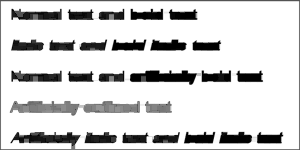

In [39]:
def opening(image):
    kernel = np.ones((5,5), np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
opening = opening(gray)
Image.fromarray(opening)

5) Canny Edge Detection

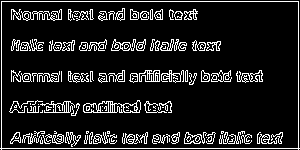

In [40]:
def canny(image):
    return cv2.Canny(image, 100, 200)
canny = canny(gray)
Image.fromarray(canny)

Lastly, we will pick out words individually in the text, by drawing a rectangle around the word we are interested in

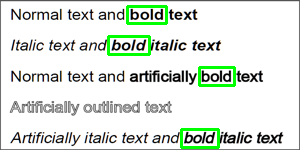

In [53]:
# Drawing pattern on specific word or sequence
img = cv2.imread('sample.png')
d = pytesseract.image_to_data(img, output_type = Output.DICT)
keys = list(d.keys())

key_word = 'bold'

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i])>60:
        if key_word == d['text'][i]:
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            img = cv2.rectangle(img, (x-3, y-3), (x+w+3, y+h+3), (0,255,0), 2)
Image.fromarray(img)

### Conclusion

In this project, text was extracted from an image, different image transformations were inspected and the identified tokens in the image were bounded by rectangles by means of a search. Individuals and organisations may employ the information in this notebook to type out the information in an image with minial time and effort expended.

In [48]:
keys

['level',
 'page_num',
 'block_num',
 'par_num',
 'line_num',
 'word_num',
 'left',
 'top',
 'width',
 'height',
 'conf',
 'text']

In [49]:
d['text']

['',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 'Normal',
 'text',
 'and',
 'bold',
 'text',
 '',
 '',
 'Italic',
 'text',
 'and',
 'bold',
 'italic',
 'text',
 '',
 '',
 'Normal',
 'text',
 'and',
 'artificially',
 'bold',
 'text',
 '',
 'Artificially',
 'outlined',
 'text',
 '',
 '',
 'Artificially',
 'italic',
 'text',
 'and',
 'bold',
 'italic',
 'text',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 '']